In [52]:
!pip install ipywidgets
!pip install pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv("/content/Bengaluru_House_Data.csv")


In [3]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
df.isnull().sum()
#as we can see, society, balcony have many null values, so to maintain highest accuracy we will remove these

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [5]:
df = df.drop(columns=['availability','balcony']) # we are removing availabilty as it is not going to be a factor in changing price

In [6]:
df = df.drop(columns=['society'])

In [7]:
df['area_type'].value_counts()
#since this data is heavily biased towards super built-up Area, we will drop the column

,count
area_type,
Super built-up Area,8790
Built-up Area,2418
Plot Area,2025
Carpet Area,87


In [8]:
df = df.drop(columns=['area_type'])

In [9]:
df.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


In [10]:
df1 = df
#creating out a copy of df incase of a function malfuncction

In [11]:
df1.dropna(inplace=True)
#clearing out the rows containing NaN values

In [12]:
df1.isnull().sum()


,0
location,0
size,0
total_sqft,0
bath,0
price,0


In [13]:
df1
#here in size column we can see many same inputs and since the format is in object we will first make it into integer format

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [14]:
df1['bedrooms'] = df1['size'].apply(lambda x: int(x.split(" ")[0]))
df1.head()
#here we have created a new column "bedrooms" in which we separated integers from size column

,location,size,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [15]:
#now we will check for unique values of bedrooms and remove size column
df1 = df1.drop(columns=['size'])

In [16]:
df1['bedrooms'].unique()
# here we can see that 27 and 43 rooms are errors hence we will limit our data to 20 rooms only


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [17]:
df1=df1[df1['bedrooms']<20]


In [18]:
df1['bedrooms'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 10, 19, 16, 14, 12, 13, 18])

In [19]:
import numpy as np
def convert_num(x):
  tokens = x.split('-')
  if len(tokens)==2:
    return(np.float64(tokens[0])+np.float64(tokens[1]))/2
  try:
    return np.float64(x)
  except:
    return None
  # this is a function created to get only one value that is mean of extremes of range in total_sqft column.

In [20]:
df1.total_sqft =df1.total_sqft.apply(convert_num)


In [21]:
df1.isnull().sum()
#here we can see some nan values have been generated and hence we will remove them

,0
location,0
total_sqft,46
bath,0
price,0
bedrooms,0


In [22]:
df1.dropna(inplace=True)


In [23]:
df1.isnull().sum()

,0
location,0
total_sqft,0
bath,0
price,0
bedrooms,0


In [24]:
df1.info()
#here we can see that we have created all other obects into float of int type

<class 'pandas.core.frame.DataFrame'>
Index: 13198 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13198 non-null  object 
 1   total_sqft  13198 non-null  float64
 2   bath        13198 non-null  float64
 3   price       13198 non-null  float64
 4   bedrooms    13198 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 618.7+ KB


In [25]:
df1['total_sqft'].describe()

,total_sqft
count,13198.000000
mean,1554.750472
std,1236.122856
min,1.000000
25%,1100.000000
50%,1275.000000
75%,1671.500000
max,52272.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7df187b95b70>,
 'caps': [<matplotlib.lines.Line2D at 0x7df187b960b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7df187b959f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7df187b965f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7df187b96890>],
 'means': []}

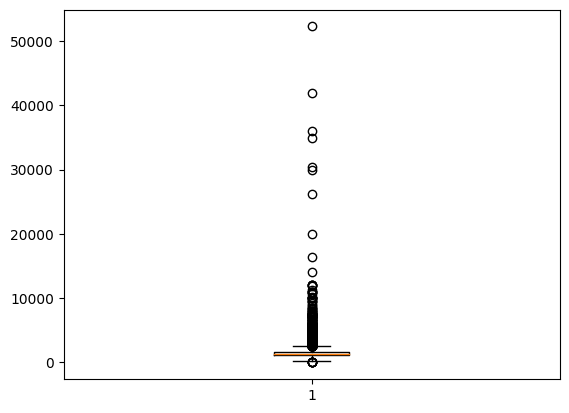

In [26]:
plt.boxplot(df1["total_sqft"])
#here a lot of outrider values are there, hence we will fix it.

{'whiskers': [<matplotlib.lines.Line2D at 0x7df187a77970>,
 'caps': [<matplotlib.lines.Line2D at 0x7df187aa1270>,
 'boxes': [<matplotlib.lines.Line2D at 0x7df187aa0bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7df187aa17b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7df187aa1a50>],
 'means': []}

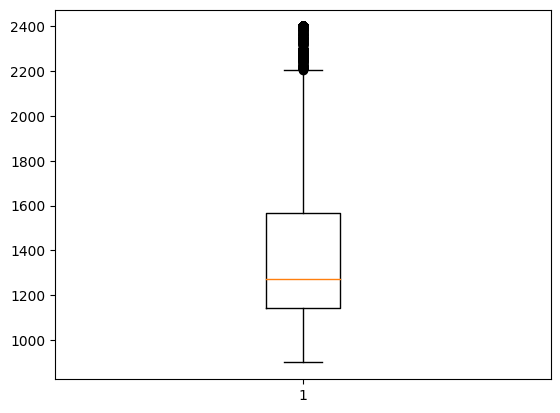

In [27]:
low,high = df1['total_sqft'].quantile([0.1,0.9])
mask_area = df1['total_sqft'].between(low,high)
df1 = df1[mask_area]
plt.boxplot(df1['total_sqft'])
#now we can see that we have prepared a better boxplot, here lower line of box represents 25%, yellow line represents 50%,top line represents 75% data lying under that value.

In [28]:
df1['bath'].value_counts()
#here we can see that not much variation is seen after 10,, hence we will remove it

,count
bath,
2.0,6468
3.0,2933
4.0,632
5.0,190
1.0,135
6.0,117
7.0,46
8.0,31
9.0,22


In [29]:
df1=df1[df1['bath']<=10]

In [30]:
df1['bath'].value_counts()


,count
bath,
2.0,6468
3.0,2933
4.0,632
5.0,190
1.0,135
6.0,117
7.0,46
8.0,31
9.0,22


In [31]:
location_stats=df1

In [32]:
df1.location.nunique()

1121

In [33]:
df1.location=df1.location.apply(lambda x:x.strip())
location_stats=df1['location'].value_counts(ascending=False)
location_stats
#here we can see that many place have only one or two

,count
location,
Whitefield,412
Sarjapur Road,320
Electronic City,242
Kanakpura Road,218
Thanisandra,205
...,...
Maruthi Extension,1
Okalipura,1
Vasantapura main road,1


In [34]:
location_stats_less_than_10=location_stats[location_stats<=10]
len(location_stats_less_than_10)

921

In [35]:
df1.location=df1.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df1.location.unique())

198

In [36]:
df1['price_per_sqft']=df1['price']*100000/df1['total_sqft']

In [37]:
df1['price_per_sqft'].describe()

,price_per_sqft
count,10583.000000
mean,6241.745188
std,3694.372194
min,500.000000
25%,4206.495405
50%,5252.246026
75%,6760.563380
max,53150.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7df14c735e70>,
 'caps': [<matplotlib.lines.Line2D at 0x7df14c736380>,
 'boxes': [<matplotlib.lines.Line2D at 0x7df14c735d50>],
 'medians': [<matplotlib.lines.Line2D at 0x7df14c736830>],
 'fliers': [<matplotlib.lines.Line2D at 0x7df14c736ad0>],
 'means': []}

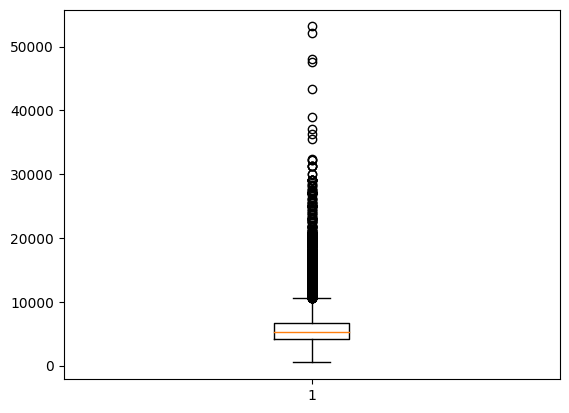

In [38]:
plt.boxplot(df1['price_per_sqft'])

In [39]:
low, high =df1["price_per_sqft"].quantile([0.1,0.9])
mask_area=df1["price_per_sqft"].between(low,high)
df1=df1[mask_area]

{'whiskers': [<matplotlib.lines.Line2D at 0x7df14c7c0eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7df14c7c12d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7df14c7c0c10>],
 'medians': [<matplotlib.lines.Line2D at 0x7df14c7c1810>],
 'fliers': [<matplotlib.lines.Line2D at 0x7df14c7c1ab0>],
 'means': []}

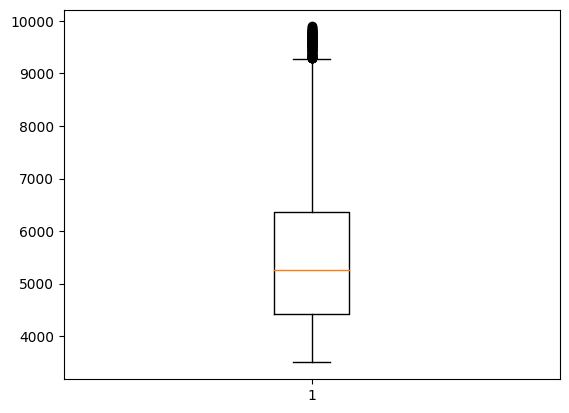

In [40]:
plt.boxplot(df1['price_per_sqft'])

In [41]:
df1.describe()


,total_sqft,bath,price,bedrooms,price_per_sqft
count,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000
mean,1381.476215,2.425635,77.729213,2.564442,5524.512900
std,324.504940,0.723413,31.925031,0.731991,1397.931569
min,900.000000,1.000000,32.000000,1.000000,3500.408831
25%,1150.000000,2.000000,54.790000,2.000000,4422.310757
50%,1293.000000,2.000000,69.230000,2.000000,5252.246026
75%,1575.000000,3.000000,93.865000,3.000000,6363.636364
max,2400.000000,10.000000,235.000000,10.000000,9893.048128


In [42]:
df1.head(10)

,location,total_sqft,bath,price,bedrooms,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
10,Whitefield,1800.0,2.0,70.00,3,3888.888889
12,7th Phase JP Nagar,1000.0,2.0,38.00,2,3800.000000
13,Gottigere,1100.0,2.0,40.00,2,3636.363636
14,Sarjapur,2250.0,3.0,148.00,3,6577.777778
15,Mysore Road,1175.0,2.0,73.50,2,6255.319149


In [43]:
df1.drop(columns=['price_per_sqft'])

,location,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,1056.0,2.0,39.07,2
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
8,Marathahalli,1310.0,3.0,63.25,3
...,...,...,...,...,...
13310,Rachenahalli,1050.0,2.0,52.71,2
13312,Bellandur,1262.0,2.0,47.00,2
13313,Uttarahalli,1345.0,2.0,57.00,3
13314,Green Glen Layout,1715.0,3.0,112.00,3


In [44]:
X=df1[["location","total_sqft","bath","bedrooms"]]
y=df1.price
model1=make_pipeline(
    OneHotEncoder(),
    LinearRegression())
model1.fit(X,y)

Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                ('linearregression', LinearRegression())])

In [45]:
y_mean=y.mean()
Y_pred_baseline=[y_mean]*len(y)

In [46]:
mae_baseline=mean_absolute_error(y,Y_pred_baseline)
mae_baseline

24.84767555672937

In [47]:
y_m=model1.predict(X)
y_m

array([ 57.42628256,  59.72393708,  91.06205014, ...,  59.4850888 ,
       111.32517556,  44.03242166])

In [48]:
mae_model=mean_absolute_error(y,y_m)
mae_model

10.427084095537369

In [49]:
def make_prediction(location,total_sqft, bath, bedrooms):
    data={
        "location": location,
        "total_sqft": total_sqft,
        "bath": bath,
        "bedrooms": bedrooms

    }
    df = pd.DataFrame(data, index=[0])

    prediction = model1.predict(df)
    return f"Predicted apartment price: {prediction}"

In [54]:
interact(
    make_prediction,
    location=Dropdown(options=sorted(X_train["location"].unique())),

    total_sqft=IntSlider(
        min=X_train["total_sqft"].min(),
        max=X_train["total_sqft"].max(),
        value=X_train["total_sqft"].mean(),
    ),


    bath=IntSlider(
    min=X_train["bath"].min(),
    max=X_train["bath"].max(),
    value=X_train["bath"].mean(),
    ),

    bedrooms=IntSlider(
    min=X_train["bedrooms"].min(),
    max=X_train["bedrooms"].max(),
    value=X_train["bedrooms"].mean(),
    ),
);

interactive(children=(Dropdown(description='location', options=('1st Phase JP Nagar', '5th Phase JP Nagar', '6…